In [1]:
# !pip install -q --upgrade tensorflow scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 132.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is inc

In [20]:
# Φόρτωμα δεδομένων
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Train:", x_train.shape, y_train.shape)   # (60000, 28, 28) (60000,)
print("Test :", x_test.shape,  y_test.shape)    # (10000, 28, 28) (10000,)


Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)


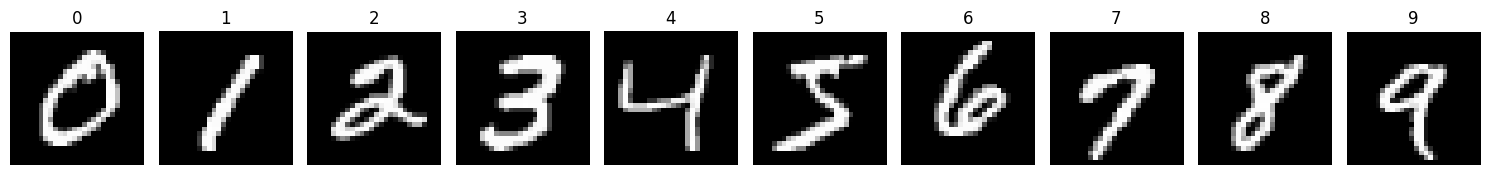

In [21]:
# Δέκα παραδείγματα 0-9
fig, axes = plt.subplots(1, 10, figsize=(15,3))
for d in range(10):
    idx = np.where(y_train == d)[0][0]
    axes[d].imshow(x_train[idx], cmap='gray')
    axes[d].set_title(d); axes[d].axis('off')
plt.tight_layout(); plt.show()


In [22]:
# Normalization + channel + one-hot
num_classes = 10

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

x_train = np.expand_dims(x_train, -1)       # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test,  -1)       # (10000, 28, 28, 1)

y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = keras.utils.to_categorical(y_test,  num_classes)

print("X_train:", x_train.shape, "  y_train_cat:", y_train_cat.shape)


X_train: (60000, 28, 28, 1)   y_train_cat: (60000, 10)


In [35]:

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(6, kernel_size=5, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=2),            # 14×14×6
    layers.Conv2D(16, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),            # 4×4×16
    layers.Flatten(),                            # 256
    layers.Dense(120, activation='relu'),
    layers.Dense(84,  activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
batch_size = 128

# (a) Dataset ➜ μη επικαλυπτόμενα mini-batches b=128
train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train_cat))
    .shuffle(buffer_size=60000, reshuffle_each_iteration=True)
    .batch(batch_size)
)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test_cat)).batch(batch_size)

loss_fn = keras.losses.CategoricalCrossentropy()

learning_rate = 0.01
momentum      = 0.9
optimizer     = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

train_acc_metric = keras.metrics.CategoricalAccuracy()
test_acc_metric  = keras.metrics.CategoricalAccuracy()

epochs = 15
history = {"loss": [], "val_loss": [], "accuracy": [], "val_accuracy": []}

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    train_loss_metric = tf.keras.metrics.Mean()
    train_acc_metric.reset_state()

    # ----- mini-batches -----
    for step, (x_batch, y_batch) in enumerate(train_ds):
        # (b) forward + στοχαστικό gradient
        with tf.GradientTape() as tape:
            logits   = model(x_batch, training=True)
            loss_val = loss_fn(y_batch, logits)
        grads = tape.gradient(loss_val, model.trainable_weights)

        # (c) ενημέρωση παραμέτρων (SGD)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        train_loss_metric.update_state(loss_val)
        train_acc_metric.update_state(y_batch, logits)

        if step % 100 == 0:
            print(f"  step {step:3d}  loss {loss_val:.4f}")

    train_loss = train_loss_metric.result().numpy()
    train_acc  = train_acc_metric.result().numpy()

    # ----- αξιολόγηση -----
    val_loss_metric = tf.keras.metrics.Mean()
    test_acc_metric.reset_state()
    for x_val, y_val in test_ds:
        val_logits = model(x_val, training=False)
        v_loss = loss_fn(y_val, val_logits)
        val_loss_metric.update_state(v_loss)
        test_acc_metric.update_state(y_val, val_logits)

    val_loss = val_loss_metric.result().numpy()
    val_acc  = test_acc_metric.result().numpy()

    # ----- καταγραφή ιστορικού -----
    history["loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["accuracy"].append(train_acc)
    history["val_accuracy"].append(val_acc)

    print(f"  ➜ Train-loss: {train_loss:.4f} | Train-acc: {train_acc:.4f}")




Epoch 1/15
  step   0  loss 2.3120
  step 100  loss 0.2158
  step 200  loss 0.2387
  step 300  loss 0.1396
  step 400  loss 0.1040
  ➜ Train-loss: 0.4426 | Train-acc: 0.8603

Epoch 2/15
  step   0  loss 0.1303
  step 100  loss 0.0669
  step 200  loss 0.0769
  step 300  loss 0.1182
  step 400  loss 0.1047
  ➜ Train-loss: 0.0892 | Train-acc: 0.9722

Epoch 3/15
  step   0  loss 0.0797
  step 100  loss 0.0595
  step 200  loss 0.0619
  step 300  loss 0.0246
  step 400  loss 0.0632
  ➜ Train-loss: 0.0630 | Train-acc: 0.9808

Epoch 4/15
  step   0  loss 0.0166
  step 100  loss 0.0784
  step 200  loss 0.0359
  step 300  loss 0.0817
  step 400  loss 0.0734
  ➜ Train-loss: 0.0511 | Train-acc: 0.9838

Epoch 5/15
  step   0  loss 0.0568
  step 100  loss 0.0045
  step 200  loss 0.0309
  step 300  loss 0.0576
  step 400  loss 0.0375
  ➜ Train-loss: 0.0419 | Train-acc: 0.9868

Epoch 6/15
  step   0  loss 0.0064
  step 100  loss 0.0399
  step 200  loss 0.0112
  step 300  loss 0.0214
  step 400  loss 

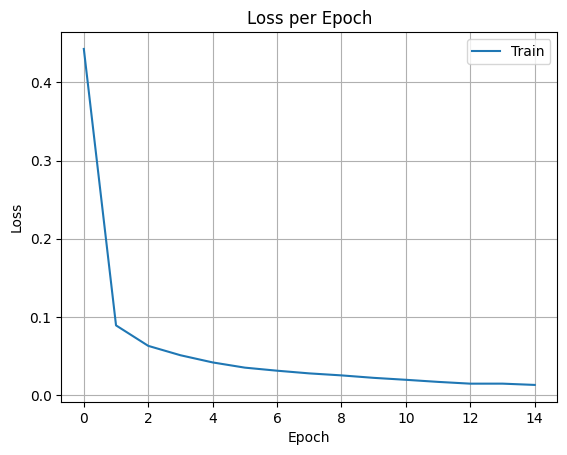

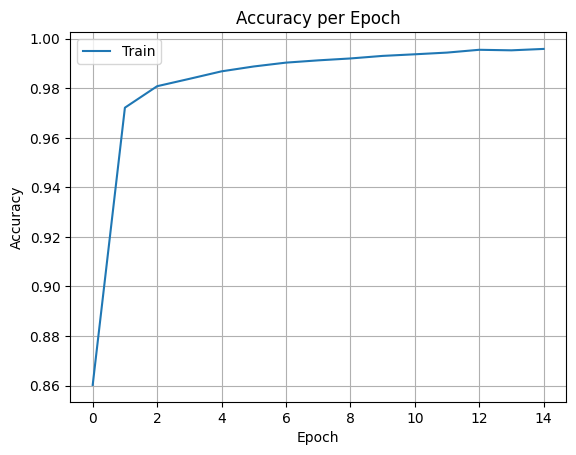

In [38]:
# ΕΞΟΔΟΙ

plt.figure()
plt.plot(history["loss"], label="Train")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss per Epoch")
plt.legend(); plt.grid(True); plt.show()

plt.figure()
plt.plot(history["accuracy"], label="Train")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy per Epoch")
plt.legend(); plt.grid(True); plt.show()

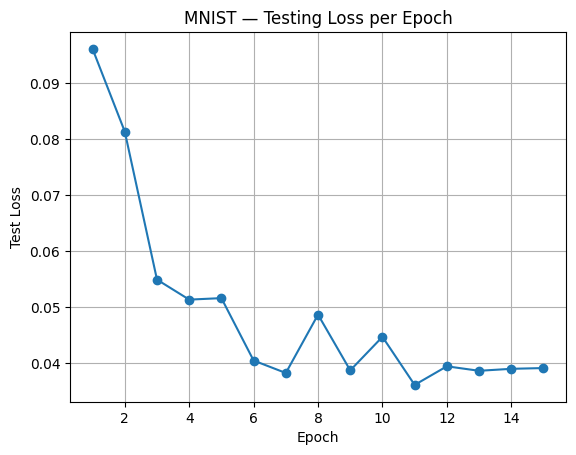

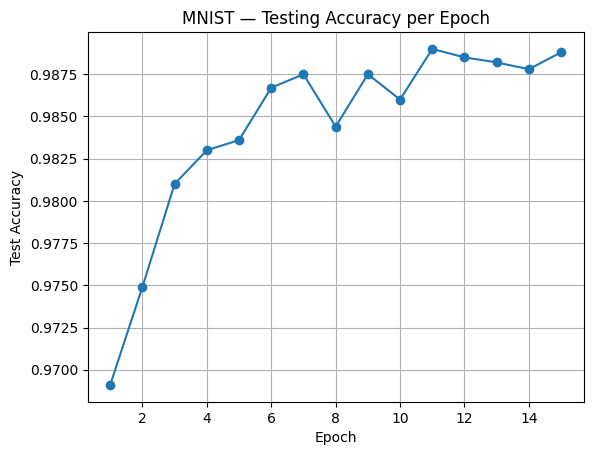

In [39]:
# Plot μόνο τα metrics του testing set

import matplotlib.pyplot as plt

epochs_range = range(1, len(history["val_loss"]) + 1)

# -------- 1. Testing Loss --------
plt.figure()
plt.plot(epochs_range, history["val_loss"], marker='o')
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.title("MNIST — Testing Loss per Epoch")
plt.grid(True)
plt.show()

# -------- 2. Testing Accuracy --------
plt.figure()
plt.plot(epochs_range, history["val_accuracy"], marker='o')
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.title("MNIST — Testing Accuracy per Epoch")
plt.grid(True)
plt.show()


Confusion Matrix:
 [[ 967    0    0    0    0    0   12    1    0    0]
 [   0 1129    0    1    0    1    2    0    2    0]
 [   1    1 1017    3    1    0    1    3    3    2]
 [   0    0    0  999    0    7    0    0    0    4]
 [   0    0    0    0  975    0    2    1    0    4]
 [   2    0    0    6    0  876    2    0    3    3]
 [   1    1    0    1    2    1  951    0    1    0]
 [   0    5    2    1    0    0    0 1011    3    6]
 [   1    0    0    3    0    0    1    1  967    1]
 [   0    1    0    0    4    3    1    3    1  996]]


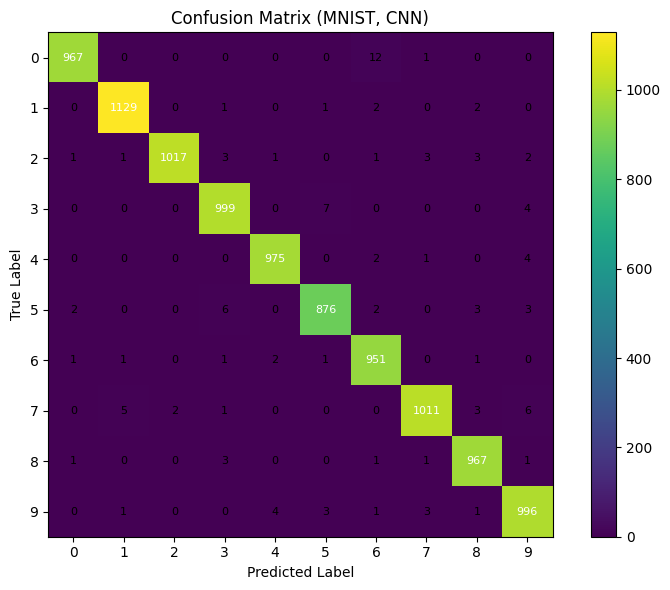

In [43]:
# Υπολογισμός confusion matrix με δική μας συνάρτηση

import numpy as np
import matplotlib.pyplot as plt

def compute_confusion_matrix(y_true, y_pred, num_classes=10):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1
    return cm

# 1. Προβλέψεις για το testing set
test_logits   = model.predict(x_test, batch_size=128, verbose=0)
y_pred_labels = np.argmax(test_logits, axis=1)

# 2. Confusion matrix
cm = compute_confusion_matrix(y_test, y_pred_labels, num_classes=10)
print("Confusion Matrix:\n", cm)

# 3. Οπτικοποίηση (heatmap)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST, CNN)")
plt.colorbar()
ticks = np.arange(10)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# αριθμητικά values μέσα στα κουτιά
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm[i, j]),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black",
                 fontsize=8)
plt.tight_layout()
plt.show()
